### import relevant libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

### import train.csv

In [7]:
train = pd.read_csv('train.csv')

### get data types (dtypes)

In [8]:
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [9]:
trainints = pd.DataFrame(train.select_dtypes(include='int64'))
trainints.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
realtrainints = trainints.drop(columns = ['MSSubClass', 'OverallQual', 'OverallCond'])
realtrainints.head()

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,2003,2003,706,0,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
1,2,9600,1976,1976,978,0,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,11250,2001,2002,486,0,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
3,4,9550,1915,1970,216,0,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,14260,2000,2000,655,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


### find summary statistics

In [11]:
realtrainints.describe()

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,9981.264932,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,9478.500000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,11601.500000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
saleprice = pd.DataFrame(realtrainints['SalePrice'])
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<AxesSubplot:>

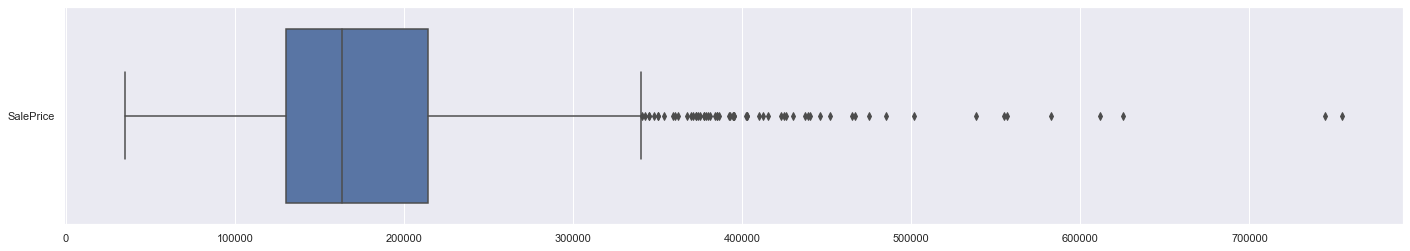

In [13]:
f = plt.figure(figsize = (24, 4))
sb.boxplot(data = saleprice, orient = "h")

<AxesSubplot:ylabel='Count'>

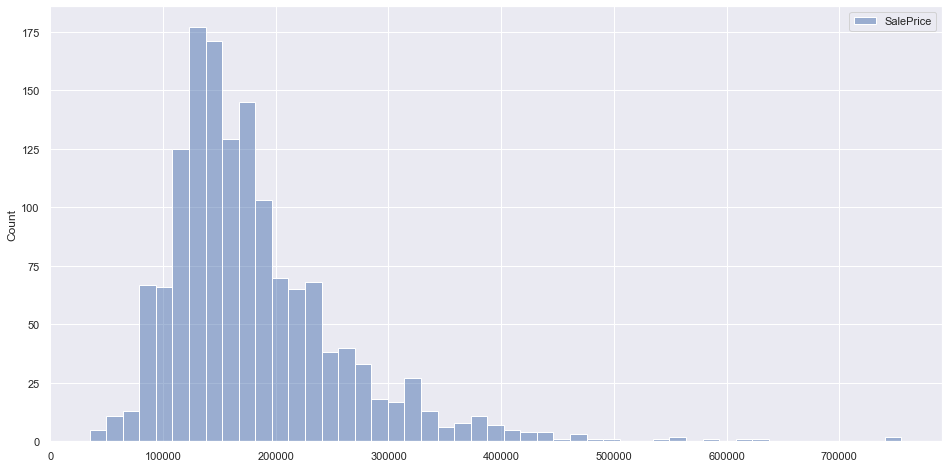

In [18]:
f = plt.figure(figsize = (16, 8))
sb.histplot(data = saleprice)

<AxesSubplot:ylabel='Density'>

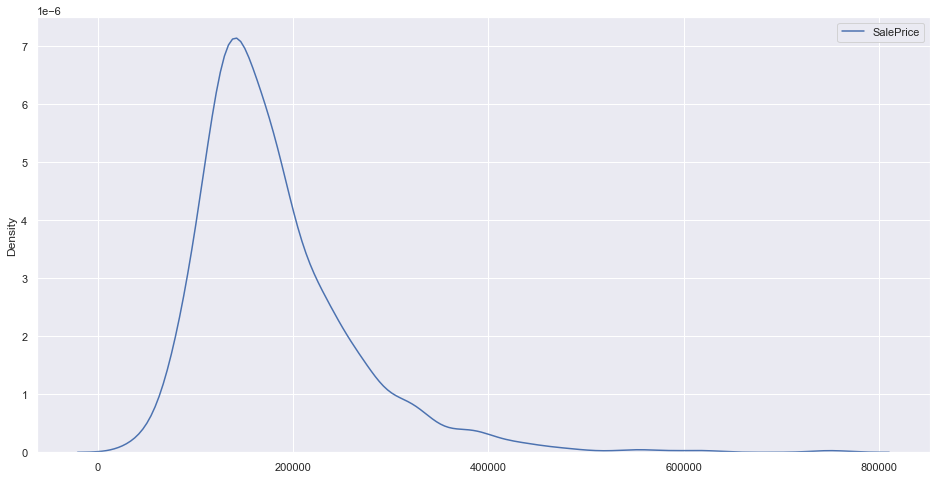

In [19]:
f = plt.figure(figsize = (16, 8))
sb.kdeplot(data = saleprice)

In [20]:
lotarea = pd.DataFrame(realtrainints['LotArea'])
lotarea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


<AxesSubplot:>

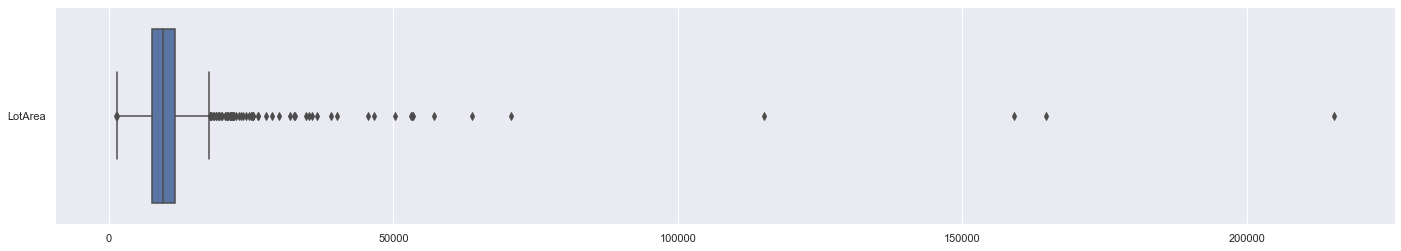

In [21]:
f = plt.figure(figsize = (24, 4))
sb.boxplot(data = lotarea, orient = "h")

<AxesSubplot:ylabel='Count'>

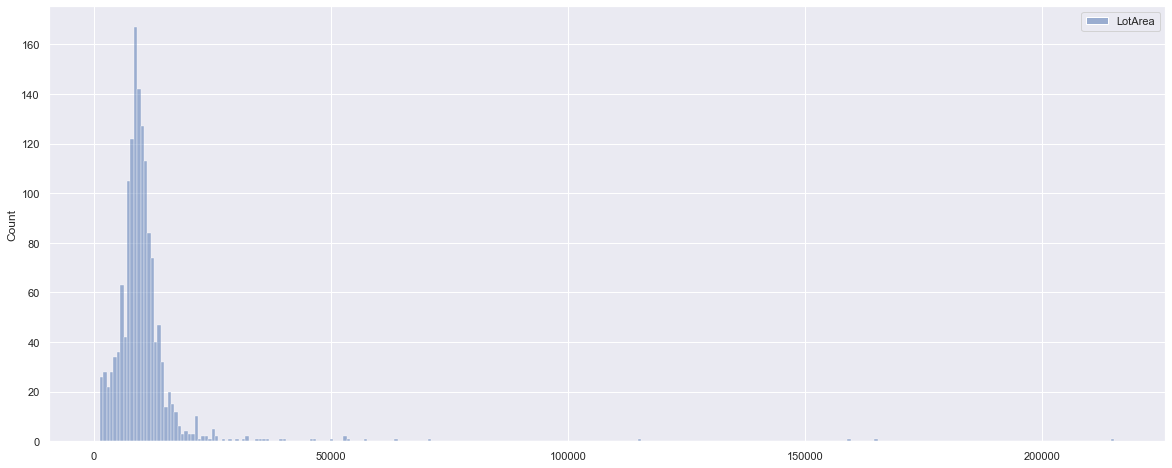

In [25]:
f = plt.figure(figsize = (20, 8))
sb.histplot(data = lotarea)

<AxesSubplot:ylabel='Density'>

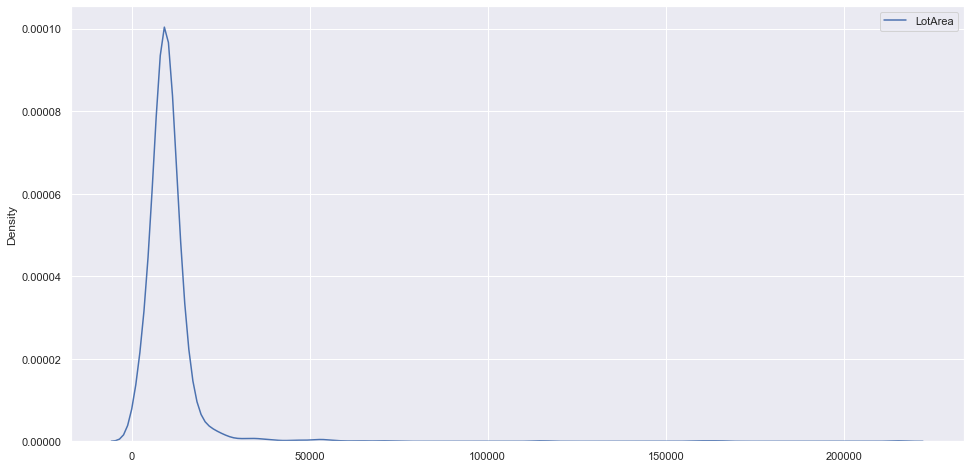

In [26]:
f = plt.figure(figsize = (16, 8))
sb.kdeplot(data = lotarea)

In [27]:
jointDF = pd.concat([lotarea, saleprice], axis = 1).reindex(lotarea.index)
jointDF

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


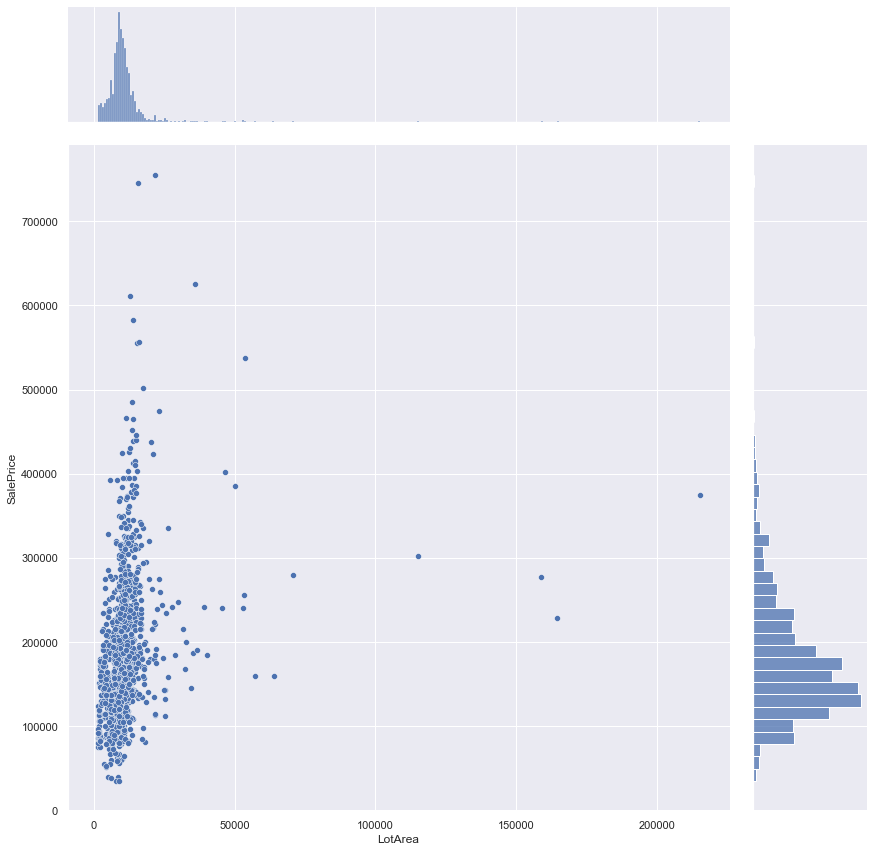

In [28]:
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

In [29]:
#calculate correlation
jointDF.corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


<AxesSubplot:>

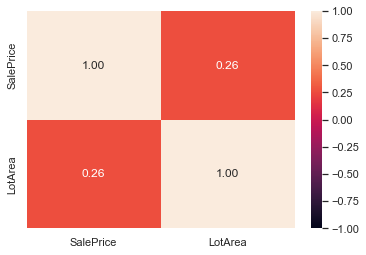

In [30]:
sb.heatmap(data = jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [31]:
bonusdf = pd.DataFrame(train.select_dtypes(include = ["int64", "float64"]))

In [32]:
bonusdf.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
